# Introduction

This notebook was inspired by: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).

It shows how the machine learning package [scikit-learn](https://scikit-learn.org) can be used to recognize images of hand-written digits, from 0-9. This example uses the a dataset consisting of **8x8 pixel** images of digits.

# Global imports

In [1]:
# import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# import datasets, SVM classifiers and performance metrics
# install sklearn by 'conda install scikit-learn' first
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Exploring the digits dataset

The digits dataset used here consists of **8x8 pixel images** of digits. The `images` attribute of the dataset stores 8x8 arrays of grayscale values for each image. The `target` attribute of the dataset stores the digit each image represents (its label) and this is included in the title of the plots below.

Hint:  
When working with image files (e.g. PNG files), the function `matplotlib.pyplot.imread()` should be used for loading.

In [2]:
# load the dataset of 8x8 pixel images of digits
digits = datasets.load_digits()

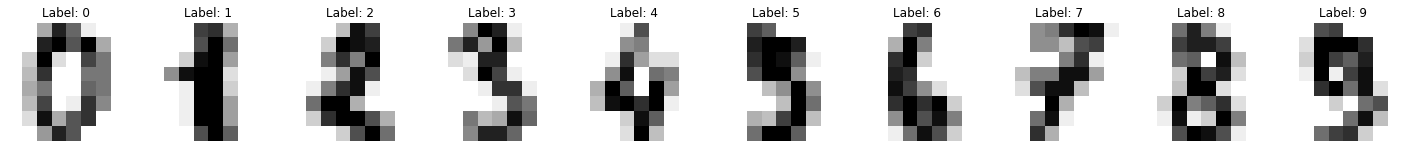

In [3]:
# plot some samples of the dataset
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(25, 8))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

# Classification by support vector classifier (SVC)

## Flatten 2-D arrays

To apply a classifier on this data, the images need to be flattened. This turns each 2-D array of grayscale values from shape `(8, 8)` into shape `(64,)`. Subsequently, the entire dataset will be of shape `(n_samples, n_features)`, where n_samples is the number of images and `n_features` is the total number of pixels in each image.

In [5]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## Split dataset

First you have to split the dataset into **50% train** and **50% test subsets**.

In [26]:
# split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [27]:
X_train.shape

(898, 64)

In [28]:
X_test.shape

(899, 64)

## Classify with SVM

Now we fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [29]:
# create the support vector classifier (SVM) object
clf = svm.SVC(gamma=0.001)

In [36]:
# learn the digits on the train subset
clf.fit(X_train, y_train)

SVC(gamma=0.001)

## Make predictions

Predict the labels of the digits from the test subset and visualize some samples.

In [31]:
# predict the value of the digit on the test subset
predicted = clf.predict(X_test)

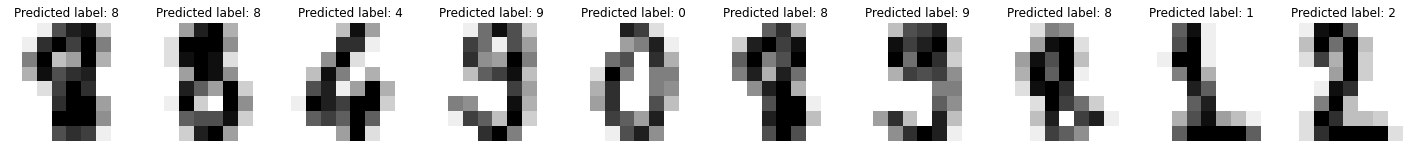

In [32]:
# plot some samples of the test subset and their predicted labels
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(25, 8))

for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Predicted label: {prediction}")

# Evaluation (metrics)

## Classification report

With the help of the function `sklearn.metrics.classification_report()` a text report showing the main classification metrics is build.

In [33]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




## Confusion matrix

By using the function `sklearn.metrics.ConfusionMatrixDisplay()` a confusion matrix of the true digit values versus the predicted digit values is plotted.

### Textual confusion matrix

In [34]:
# print textual confusion matrix
cm_text = metrics.confusion_matrix(y_test, predicted)

print(f"Confusion matrix:\n{cm_text}")

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


### Colored confusion matrix

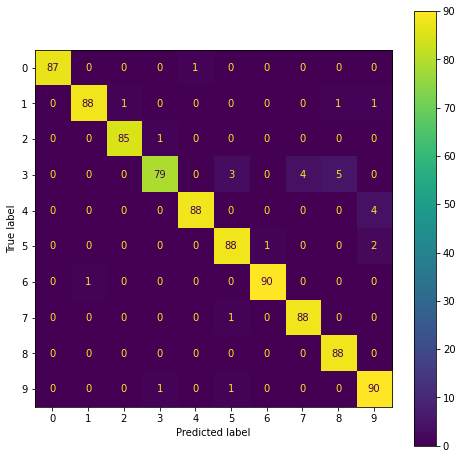

In [65]:
# print colored confusion matrix
cm_colored = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

#cm_colored.figure_.suptitle("Confusion Matrix")
cm_colored.figure_.set_figwidth(8)
cm_colored.figure_.set_figheight(8)

cm_colored.confusion_matrix
plt.show()

# Presentation mode

Start presentation mode with:

```bash
$ jupyter nbconvert SVM_MNIST_8x8_scikit.ipynb --to slides --post serve
```

Refer to:
- [Presenting Code Using Jupyter Notebook Slides](https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67)
- [5 Slides for Tips on Presentation Mode in Jupyter Notebook](https://towardsdatascience.com/5-slides-for-tips-on-presentation-mode-in-jupyter-notebook-f858b15fff4f)
- [RISE: Reveal.js - Jupyter/IPython Slideshow Extension](https://rise.readthedocs.io/en/maint-5.5/index.html)